In [2]:
options(warn=-1)

In [3]:
college <- read.csv("https://raw.githubusercontent.com/csquared/udacity-dlnd/master/nn/binary.csv") 

head(college)
nrow(college)

,admit,gre,gpa,rank
,<int>,<int>,<dbl>,<int>
1,0,380,3.61,3
2,1,660,3.67,3
3,1,800,4.00,1
4,1,640,3.19,4
5,0,520,2.93,4
6,1,760,3.00,2


[1] 400

In [4]:
install.packages("caTools")
library(caTools)
split <- sample.split(college, SplitRatio = 0.75)
split 

Installing package into 'C:/Users/User/AppData/Local/R/win-library/4.2'
(as 'lib' is unspecified)



package 'caTools' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\User\AppData\Local\Temp\RtmpIVOjEN\downloaded_packages


[1]  TRUE FALSE  TRUE  TRUE

In [5]:
training_reg <- subset(college, split == "TRUE")
test_reg <- subset(college, split == "FALSE")

fit_MRegressor_model <- lm(formula = admit ~ gre+gpa+rank, data = training_reg)

predict_reg <- predict(fit_MRegressor_model,newdata = test_reg)
predict_reg 

2            6           10           14           18           22 
 0.307059261  0.370650471  0.506754268  0.364253481  0.018912179  0.444245238 
          26           30           34           38           42           46 
 0.639899434  0.483944925  0.409634865  0.129840386  0.365031004  0.203175979 
          50           54           58           62           66           70 
 0.166243106  0.389829637  0.090032986  0.070431380  0.417490993  0.651774500 
          74           78           82           86           90           94 
 0.480388784  0.409634865  0.335932384  0.287383619  0.507013442  0.298869924 
          98          102          106          110          114          118 
 0.374161129  0.263470223  0.358904992  0.353803874  0.498694518  0.472825509 
         122          126          130          134          138          142 
 0.221481714  0.073953843  0.008311112  0.153720105  0.376354042  0.150953291 
         146          150          154          158          162          166 
 0.173158445  0.560555612  0.244809405  0.519829297  0.415535380  0.664297501 
         170          174          178          182          186          190 
 0.278608577  0.456909632  0.219103662  0.145463411  0.485749077  0.343495659 
         194          198          202          206          210          214 
 0.056329723  0.001914121  0.344673748  0.369049942  0.395566887  0.251206396 
         218          222          226          230          234          238 
 0.523351760  0.368001440  0.298188309  0.428588535  0.057541490  0.447107961 
         242          246          250          254          258          262 
 0.572159699  0.394366924  0.310581724  0.102793288  0.341247194  0.289598406 
         266          270          274          278          282          286 
 0.157890504  0.107916280  0.535627392  0.553110120  0.139359273  0.082047271 
         290          294          298          302          306          310 
-0.155984195  0.692489011  0.282683067  0.295184195  0.100837676  0.116787231 
         314          318          322          326          330          334 
 0.113101503  0.196238767  0.369201402  0.640676957 -0.015698194  0.233063927 
         338          342          346          350          354          358 
 0.051381801  0.100741767  0.145237915  0.298610749  0.438896750  0.553899448 
         362          366          370          374          378          382 
 0.524529849  0.096170802  0.534945778  0.530797252  0.553606595  0.380558119 
         386          390          394          398 
 0.404860278  0.417231818  0.451290165  0.208039797

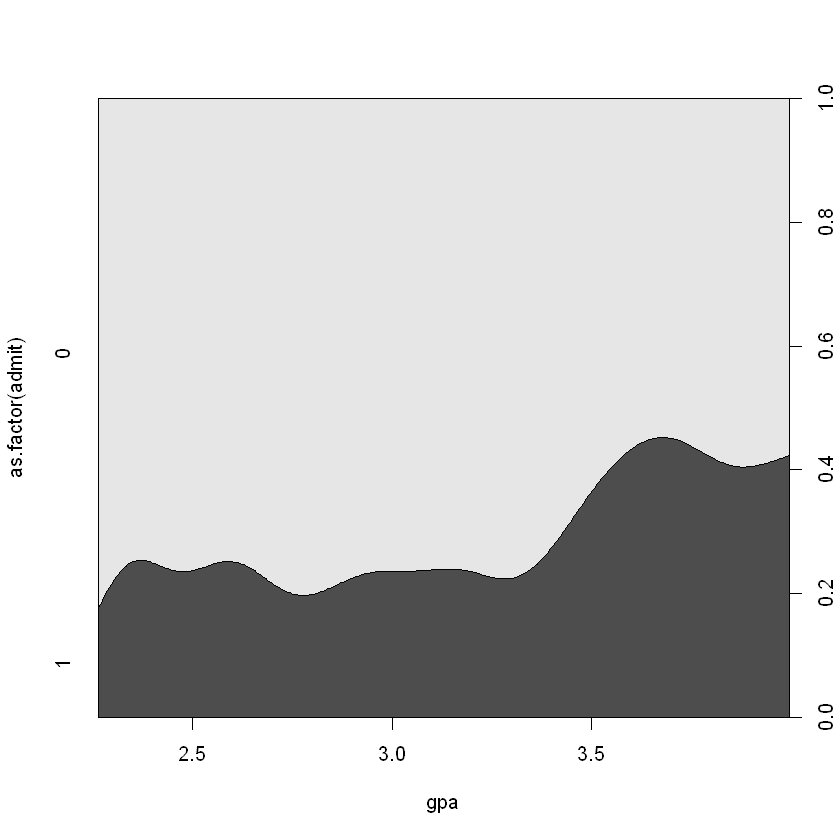

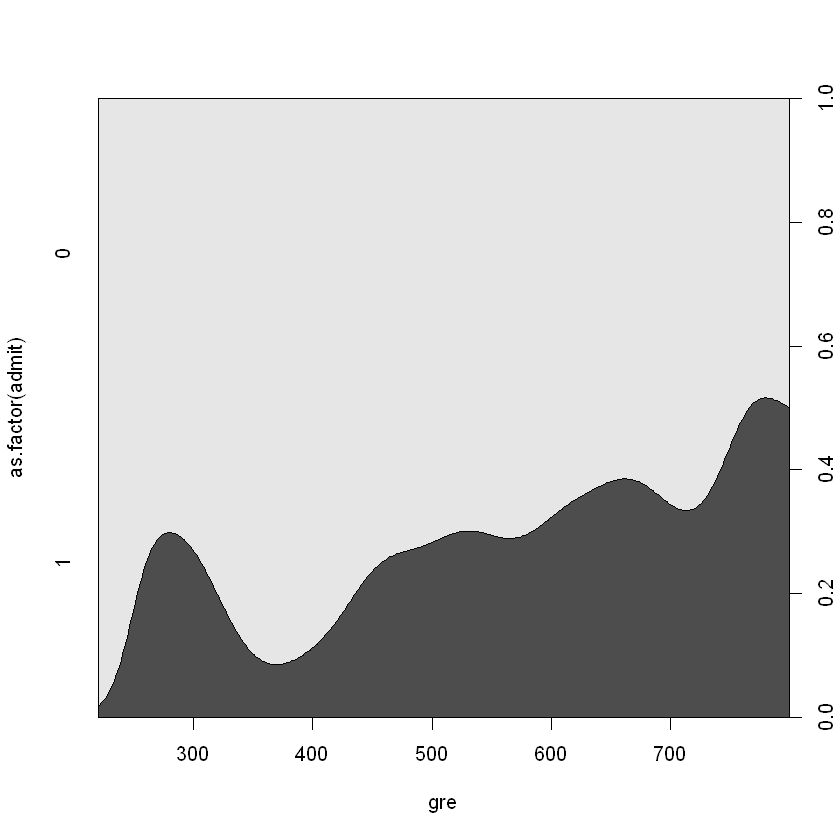

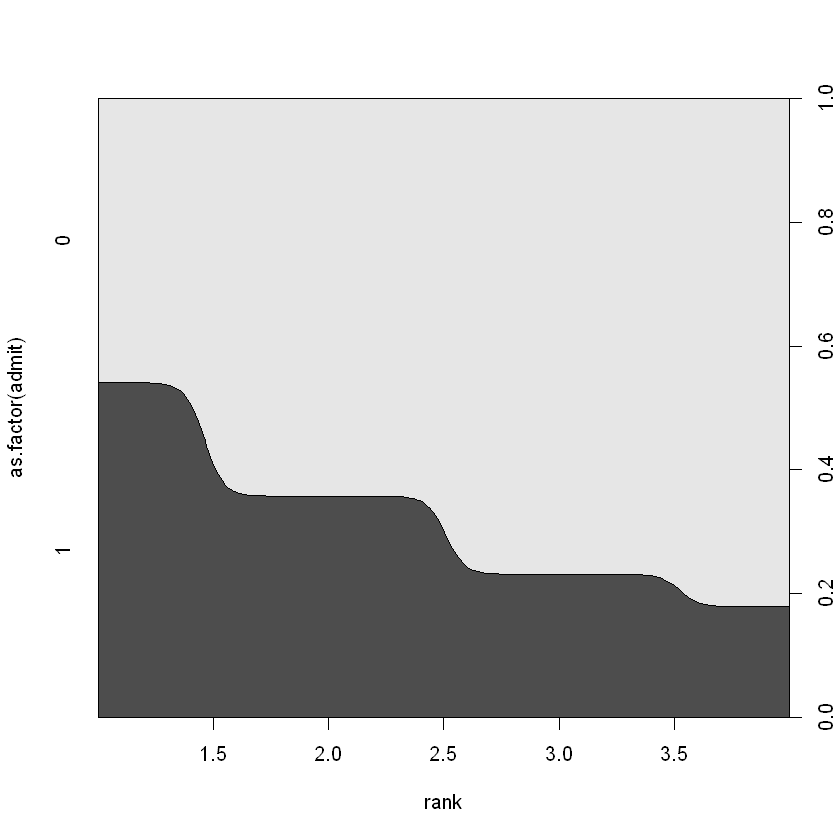

In [6]:
cdplot(as.factor(admit)~ gpa, data=college)
cdplot(as.factor(admit)~ gre, data=college)
cdplot(as.factor(admit)~ rank, data=college) 

In [7]:
predict_reg <- ifelse(predict_reg >0.5,1,0)
predict_reg
table(test_reg$admit, predict_reg)


2   6  10  14  18  22  26  30  34  38  42  46  50  54  58  62  66  70  74  78 
  0   0   1   0   0   0   1   0   0   0   0   0   0   0   0   0   0   1   0   0 
 82  86  90  94  98 102 106 110 114 118 122 126 130 134 138 142 146 150 154 158 
  0   0   1   0   0   0   0   0   0   0   0   0   0   0   0   0   0   1   0   1 
162 166 170 174 178 182 186 190 194 198 202 206 210 214 218 222 226 230 234 238 
  0   1   0   0   0   0   0   0   0   0   0   0   0   0   1   0   0   0   0   0 
242 246 250 254 258 262 266 270 274 278 282 286 290 294 298 302 306 310 314 318 
  1   0   0   0   0   0   0   0   1   1   0   0   0   1   0   0   0   0   0   0 
322 326 330 334 338 342 346 350 354 358 362 366 370 374 378 382 386 390 394 398 
  0   1   0   0   0   0   0   0   0   1   1   0   1   1   1   0   0   0   0   0

   predict_reg
     0  1
  0 56  9
  1 26  9